In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('salary.csv')

In [5]:
df.head()

,age,education.num,capital.gain,hours.per.week,income
0,90,9,0,40,<=50K
1,82,9,0,18,<=50K
2,66,10,0,40,<=50K
3,54,4,0,40,<=50K
4,41,10,0,40,<=50K


In [6]:
df.shape 

(32561, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   education.num   32561 non-null  int64 
 2   capital.gain    32561 non-null  int64 
 3   hours.per.week  32561 non-null  int64 
 4   income          32561 non-null  object
dtypes: int64(4), object(1)
memory usage: 1.2+ MB


In [51]:
df.describe()

,age,education.num,capital.gain,hours.per.week,income
count,32561.000000,32561.000000,32561.000000,32561.000000,0.0
mean,38.375541,10.326679,1077.648844,10.088142,NaN
std,13.300891,2.201408,7385.292085,0.822686,NaN
min,17.000000,5.000000,0.000000,5.000000,NaN
25%,28.000000,9.000000,0.000000,10.000000,NaN
50%,37.000000,10.000000,0.000000,10.000000,NaN
75%,47.000000,12.000000,0.000000,10.000000,NaN
max,78.000000,16.000000,99999.000000,16.000000,NaN


In [52]:
df.isnull().sum()

age                   0
education.num         0
capital.gain          0
hours.per.week        0
income            32561
dtype: int64

In [10]:
df['age'].unique()

array([90, 82, 66, 54, 41, 34, 38, 74, 68, 45, 52, 32, 51, 46, 57, 22, 37,
       29, 61, 21, 33, 49, 23, 59, 60, 63, 53, 44, 43, 71, 48, 73, 67, 40,
       50, 42, 39, 55, 47, 31, 58, 62, 36, 72, 78, 83, 26, 70, 27, 35, 81,
       65, 25, 28, 56, 69, 20, 30, 24, 64, 75, 19, 77, 80, 18, 17, 76, 79,
       88, 84, 85, 86, 87], dtype=int64)

In [11]:
df['education.num'].unique()

array([ 9, 10,  4,  6, 16, 15, 13, 14,  7, 12, 11,  2,  3,  8,  5,  1],
      dtype=int64)

In [46]:
df['hours.per.week'].unique()

array([40, 18, 45, 20, 60, 35, 55, 76, 50, 42, 25, 32, 90, 48, 15, 70, 52,
       72, 39,  6, 65, 12, 80, 67, 99, 30, 75, 26, 36, 10, 84, 38, 62, 44,
        8, 28, 59,  5, 24, 57, 34, 37, 46, 56, 41, 98, 43, 63,  1, 47, 68,
       54,  2, 16,  9,  3,  4, 33, 23, 22, 64, 51, 19, 58, 53, 96, 66, 21,
        7, 13, 27, 11, 14, 77, 31, 78, 49, 17, 85, 87, 88, 73, 89, 97, 94,
       29, 82, 86, 91, 81, 92, 61, 74, 95], dtype=int64)

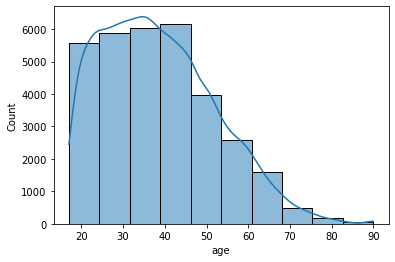

In [13]:
import seaborn as sns
sns.histplot(df['age'], bins=10, kde=True);

age                  AxesSubplot(0.125,0.71587;0.168478x0.16413)
education.num     AxesSubplot(0.327174,0.71587;0.168478x0.16413)
capital.gain      AxesSubplot(0.529348,0.71587;0.168478x0.16413)
hours.per.week    AxesSubplot(0.731522,0.71587;0.168478x0.16413)
income              AxesSubplot(0.125,0.518913;0.168478x0.16413)
dtype: object

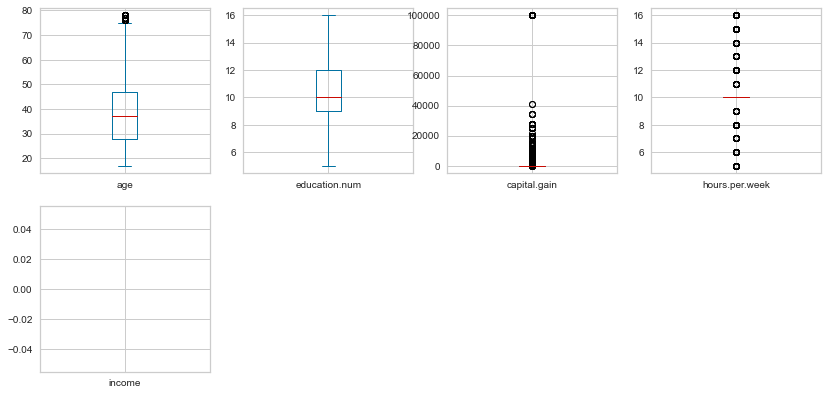

In [50]:
df.plot(kind='box', subplots=True, layout=(4, 4), figsize=(14, 14))


In [49]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum().sort_values(ascending=False)

capital.gain      2712
hours.per.week    1163
age                 98
education.num        0
income               0
dtype: int64

In [42]:
q1 = df["education.num"].quantile(0.25)
q3 = df["education.num"].quantile(0.75)
iqr = q3-q1

lower_bound = q1-1.5*iqr
upper_bound = q3+1.5*iqr
mn = int(df["education.num"].median())
   
for value in df["education.num"]:
    if value > upper_bound or value < lower_bound:
        df["education.num"] = df["education.num"].replace(value, mn) #(replace(current_value, new_value))

In [17]:
income_set = set(df['income'])
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1}).astype(int)
print(df.head())


   age  education.num  capital.gain  hours.per.week  income
0   90              9             0              40       0
1   82              9             0              18       0
2   66             10             0              40       0
3   54              4             0              40       0
4   41             10             0              40       0


In [18]:
x=df.drop('income', axis=1)
y=df['income']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 0)

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test) 

Text(0, 0.5, 'Mean Error')

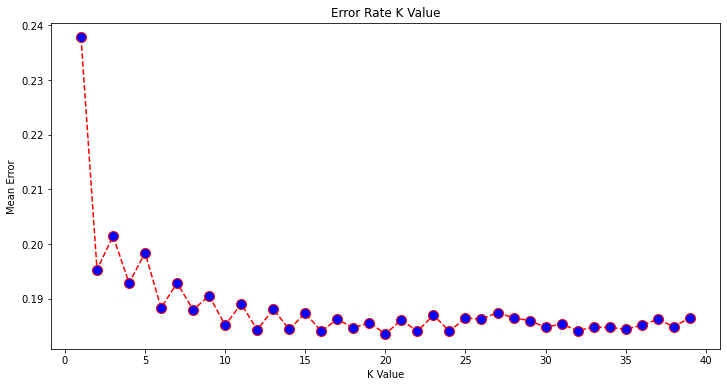

In [21]:
error = []
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    pred_i = model.predict(X_test)
    error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [22]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 12, metric = 'minkowski', p = 2)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=12)

In [23]:
age = int(input("Enter New Employee's Age: "))
edu = int(input("Enter New Employee's Education: "))
cg = int(input("Enter New Employee's Captital Gain: "))
wh = int(input("Enter New Employee's Hour's Per week: "))
newEmp = [[age,edu,cg,wh]]
result = model.predict(sc.transform(newEmp))
print(result)

if result == 1:
  print("Employee might got Salary above 50K")
else:
  print("Customer might not got  Salary above 50K")

Enter New Employee's Age: 4
Enter New Employee's Education: 4
Enter New Employee's Captital Gain: 4
Enter New Employee's Hour's Per week: 4
[0]
Customer might not got  Salary above 50K


C:\Users\amres\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [24]:
y_pred = model.predict(X_test)
 

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix: ")
print(cm)

print("Accuracy of the Model: {0}%".format(accuracy_score(y_test, y_pred)*100))

Confusion Matrix: 
[[5875  318]
 [1182  766]]
Accuracy of the Model: 81.57474511730746%


In [26]:
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier().fit(X_train,y_train)
y_pred = rf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      6193
           1       0.64      0.44      0.52      1948

    accuracy                           0.81      8141
   macro avg       0.74      0.68      0.70      8141
weighted avg       0.79      0.81      0.79      8141



In [27]:
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier().fit(X_train,y_train)
y_pred = gbm.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.96      0.89      6193
           1       0.75      0.40      0.52      1948

    accuracy                           0.82      8141
   macro avg       0.79      0.68      0.71      8141
weighted avg       0.81      0.82      0.80      8141

